# Table of Contents

[Imports](#Imports) <br>
[Load Data](#Load-Data) <br>
[Data Attributes](#Data-Attributes)

# Imports

In [1]:
# install latest version of seaborn to run relplots
# !!!will only work if installed before importing seaborn!!!
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
# Main Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math

# train-test split
from sklearn.model_selection import train_test_split

# linear regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor

# cross val, k-folds, scaler, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler


# ignore warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
warnings.filterwarnings("ignore", category=Warning)
print('Warnings will be ignored!')

# suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Warnings will be ignored!


# Load Data

In [0]:
orig = pd.read_csv('https://raw.githubusercontent.com/hjhuney/Data/master/energy_usage.csv')
df = pd.read_csv('https://raw.githubusercontent.com/hjhuney/Data/master/energy_usage.csv')

# Data Attributes

In [4]:
print(orig.head())

              date  TotalConsmp       R1      H_1       R2      H_2       R3  \
0  1/11/2016 17:00           90 19.89000 47.59667 19.20000 44.79000 19.79000   
1  1/11/2016 17:10           90 19.89000 46.69333 19.20000 44.72250 19.79000   
2  1/11/2016 17:20           80 19.89000 46.30000 19.20000 44.62667 19.79000   
3  1/11/2016 17:30           90 19.89000 46.06667 19.20000 44.59000 19.79000   
4  1/11/2016 17:40          100 19.89000 46.33333 19.20000 44.53000 19.79000   

       H_3       R4      H_4     ...          H_7       R8      H_8       R9  \
0 44.73000 19.00000 45.56667     ...     41.62667 18.20000 48.90000 17.03333   
1 44.79000 19.00000 45.99250     ...     41.56000 18.20000 48.86333 17.06667   
2 44.93333 18.92667 45.89000     ...     41.43333 18.20000 48.73000 17.00000   
3 45.00000 18.89000 45.72333     ...     41.29000 18.10000 48.59000 17.00000   
4 45.00000 18.89000 45.53000     ...     41.23000 18.10000 48.59000 17.00000   

       H_9  TempOutSide  Press_mm_hg  

In [5]:
print(orig.describe())

       TotalConsmp          R1         H_1          R2         H_2  \
count  19735.00000 19735.00000 19735.00000 19735.00000 19735.00000   
mean     101.49683    21.68657    40.25974    20.34122    40.42042   
std      104.38083     1.60607     3.97930     2.19297     4.06981   
min       10.00000    16.79000    27.02333    16.10000    20.46333   
25%       50.00000    20.76000    37.33333    18.79000    37.90000   
50%       60.00000    21.60000    39.65667    20.00000    40.50000   
75%      100.00000    22.60000    43.06667    21.50000    43.26000   
max     1110.00000    26.26000    63.36000    29.85667    56.02667   

               R3         H_3          R4         H_4          R5     ...      \
count 19735.00000 19735.00000 19735.00000 19735.00000 19735.00000     ...       
mean     22.26761    39.24250    20.85533    39.02690    19.59211     ...       
std       2.00611     3.25458     2.04288     4.34132     1.84462     ...       
min      17.20000    28.76667    15.10000    

In [6]:
print(orig.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 25 columns):
date           19735 non-null object
TotalConsmp    19735 non-null int64
R1             19735 non-null float64
H_1            19735 non-null float64
R2             19735 non-null float64
H_2            19735 non-null float64
R3             19735 non-null float64
H_3            19735 non-null float64
R4             19735 non-null float64
H_4            19735 non-null float64
R5             19735 non-null float64
H_5            19735 non-null float64
R6             19735 non-null float64
H_6            19735 non-null float64
R7             19735 non-null float64
H_7            19735 non-null float64
R8             19735 non-null float64
H_8            19735 non-null float64
R9             19735 non-null float64
H_9            19735 non-null float64
TempOutSide    19735 non-null float64
Press_mm_hg    19735 non-null float64
H_OutSide      19735 non-null float64
Windspeed      19735

# Check for Nulls

In [7]:
orig.isnull().sum()

date           0
TotalConsmp    0
R1             0
H_1            0
R2             0
H_2            0
R3             0
H_3            0
R4             0
H_4            0
R5             0
H_5            0
R6             0
H_6            0
R7             0
H_7            0
R8             0
H_8            0
R9             0
H_9            0
TempOutSide    0
Press_mm_hg    0
H_OutSide      0
Windspeed      0
Visibility     0
dtype: int64

# Transform Time Series Data

In [8]:
# view of first 20 dates
df['date'][:20]

0     1/11/2016 17:00
1     1/11/2016 17:10
2     1/11/2016 17:20
3     1/11/2016 17:30
4     1/11/2016 17:40
5     1/11/2016 17:50
6     1/11/2016 18:00
7     1/11/2016 18:10
8     1/11/2016 18:20
9     1/11/2016 18:30
10    1/11/2016 18:40
11    1/11/2016 18:50
12    1/11/2016 19:00
13    1/11/2016 19:10
14    1/11/2016 19:20
15    1/11/2016 19:30
16    1/11/2016 19:40
17    1/11/2016 19:50
18    1/11/2016 20:00
19    1/11/2016 20:10
Name: date, dtype: object

In [9]:
# generate random numbers for df; then look at 25 random values for 'date'
rand_numbers = np.random.randint(0,len(df['date'])-1,20)

for i in rand_numbers:
  print(df['date'][i])

2/8/2016 4:00
3/14/2016 22:30
2/18/2016 11:40
5/14/2016 8:40
5/20/2016 21:50
2/14/2016 9:30
1/26/2016 10:50
3/1/2016 10:00
4/16/2016 2:20
4/25/2016 14:00
4/16/2016 8:10
4/11/2016 21:10
5/19/2016 9:40
1/30/2016 21:20
5/1/2016 19:20
1/29/2016 5:20
5/1/2016 6:00
2/1/2016 23:40
5/24/2016 21:40
1/13/2016 13:00


In [0]:
df['date'] = pd.to_datetime(df['date'])

In [0]:
# create function to extract datetime features
def date_extraction(feature):
  month_list = []
  day_list = []  
  day_of_week_list = []
  day_of_year_list = []
  hour_list = []
  
  for i in feature:
    month_list.append(i.month)
    day_list.append(i.day)
    day_of_week_list.append(i.dayofweek)
    day_of_year_list.append(i.dayofyear)
    hour_list.append(i.hour)
    
  return month_list, day_list, day_of_week_list, day_of_year_list, hour_list

In [0]:
df['month'] = date_extraction(df['date'])[0]
df['day'] = date_extraction(df['date'])[1]
df['day_of_week'] = date_extraction(df['date'])[2]
df['day_of_year'] = date_extraction(df['date'])[3]
df['hour'] = date_extraction(df['date'])[4]

In [0]:
# create days dictionary to map day of week values out
days_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3:'Thursday', 
            4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [0]:
df['day_week_alpha'] = df['day_of_week'].map(days_dict)

# Transformations

In [0]:
# average temperatures excluding Room 6
df['avr_room_temp'] = (df['R1'] + df['R2'] + df['R3'] + df['R4'] + df['R5'] + df['R7'] + df['R8'] + df['R9'])/8
df['avr_room_hum'] = (df['H_1'] + df['H_2'] + df['H_3'] + df['H_4'] + df['H_5'] + df['H_7'] + df['H_8'] + df['H_9'])/8

In [0]:
# add column that finds difference on Total Consumption between 2 consecutive datapoints 
df['incr_prior'] = np.abs(df['TotalConsmp'] - df['TotalConsmp'].shift(1))
df['incr_prior'][0] = 0

In [0]:
df['incr_prior_%'] = df['incr_prior'] / df['TotalConsmp']

In [0]:
# create 90 minute average consumption variable (current time, +/- 4 prior 10 min intervals)
avr_list = []

for i in range(len(df)):
  if np.mean(df['TotalConsmp'][i-4:i+4]) is not np.nan:
    avr_list.append(np.mean(df['TotalConsmp'][i-4:i+4]))
  else:
    avr_list.append(df['TotalConsmp'][i])

    
df['consmp_90m_avr'] = avr_list

In [0]:
# create 24 hour consumption variable
energy24_list = []

for i in range(len(df)):
  if np.mean(df['TotalConsmp'][i-143:i]) is not np.nan:
    energy24_list.append(np.sum(df['TotalConsmp'][i-143:i+1]))
  else:
    energy24_list.append(0)

    
df['consmp_24h'] = energy24_list

In [0]:
# conversion to Fahrenheit for heat index
df['TempOutSide_F'] = (df['TempOutSide'] * 9/5) + 32

In [0]:
# heat index in F
df['HeatIndex_F'] = 0.5 * (df['TempOutSide_F'] + 61 + ((df['TempOutSide_F'] - 68) * 1.2) + (df['H_OutSide'] * 0.094))

In [0]:
# heat index converted back to Celsius
df['HeatIndex_C'] = (df['HeatIndex_F'] - 32) * 5/9

In [0]:
# wind chill in F
# note that windspeed calculated in m/s; converted to mph at 1 : 2.23694 ratio

df['WindChill_F'] = (35.74 + (0.6215 * df['TempOutSide_F']) - (35.75 * ((df['Windspeed'] * 2.23694) * 0.16)) + (0.4275 * df['TempOutSide_F'])
                    * ((df['Windspeed'] * 2.23694) * 0.16))

df['WindChill_C'] = (df['WindChill_F'] - 32) * 5/9

In [0]:
# features that examines room temps vs outside temps
df['AvrRoomTemp_v_Outside'] = df['avr_room_temp'] - df['TempOutSide']

In [0]:
# features that examines room temps vs windchill
df['AvrRoomTemp_v_Windchill'] = df['avr_room_temp'] - df['WindChill_C']

In [0]:
# air conditioning binomial
ac_list = []

for i in range(len(df)):
  if df['AvrRoomTemp_v_Outside'][i] < -2:
    ac_list.append(1)
  else:
    ac_list.append(0)
    
df['AC'] = ac_list

In [0]:
# heating binominal
heat_list = []

for i in range(len(df)):
  if df['AvrRoomTemp_v_Outside'][i] > 2:
    heat_list.append(1)
  else:
    heat_list.append(0)
    
df['Heat'] = heat_list

In [0]:
# add categorical variable for time of day; peak hours at highest
tod_list = []

for i in range(len(df)):
  if df['hour'][i] < 4:
    tod_list.append(0)
  elif df['hour'][i] >= 19:
    tod_list.append(1)
  elif df['hour'][i] >= 4 and df['hour'][i] < 9:
    tod_list.append(2)
  else:
    tod_list.append(3)
    
df['time_of_day'] = tod_list

In [0]:
room_list = ['R1', 'R2', 'R3',  'R4', 'R5', 'R6',  'R7', 'R8']
hum_list = ['H_1', 'H_2', 'H_3', 'H_4', 'H_5', 'H_6', 'H_7', 'H_8']

In [0]:
for i in df[room_list]:
  temp_diff = i + "_Diff"
  temp_diff_abs = i + "_Diff_Abs"
  df[temp_diff] = df[i] - df['TempOutSide']
  df[temp_diff_abs] = np.abs(df[temp_diff])  

In [0]:
# df.to_csv("energy_usage_mod.csv",index=False)

# from google.colab import files
# files.download('energy_usage_mod.csv')

In [0]:
# print(df[140:200].to_string())

# Room 6 is Different

In [33]:
rooms_only = df[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9']]
print(rooms_only.head())

        R1       R2       R3       R4       R5      R6       R7       R8  \
0 19.89000 19.20000 19.79000 19.00000 17.16667 7.02667 17.20000 18.20000   
1 19.89000 19.20000 19.79000 19.00000 17.16667 6.83333 17.20000 18.20000   
2 19.89000 19.20000 19.79000 18.92667 17.16667 6.56000 17.20000 18.20000   
3 19.89000 19.20000 19.79000 18.89000 17.16667 6.43333 17.13333 18.10000   
4 19.89000 19.20000 19.79000 18.89000 17.20000 6.36667 17.20000 18.10000   

        R9  
0 17.03333  
1 17.06667  
2 17.00000  
3 17.00000  
4 17.00000  


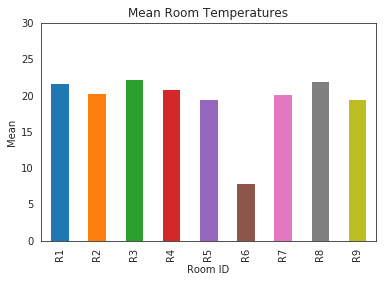

In [34]:
# plot of mean room temperatures
rooms_mean = np.mean(rooms_only)

sns.set_style("white")

rooms_mean.plot.bar()

plt.ylabel('Mean')
plt.xlabel('Room ID')
plt.title('Mean Room Temperatures')
plt.yticks(np.arange(0, 35, 5));

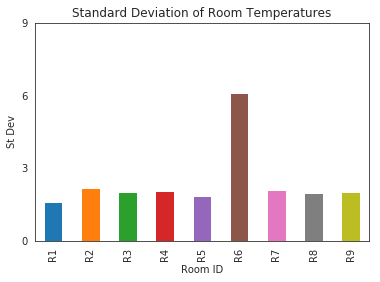

In [35]:
# room standard deviation
rooms_std = np.std(rooms_only)

sns.set_style("white")


rooms_std.plot.bar()

plt.ylabel('St Dev')
plt.xlabel('Room ID')
plt.title('Standard Deviation of Room Temperatures')
plt.yticks(np.arange(0, 10, 3));

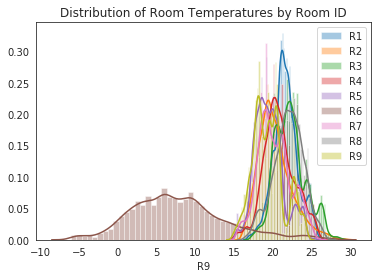

In [36]:
for i in rooms_only:
  sns.distplot(df[i], label=i)

plt.title('Distribution of Room Temperatures by Room ID')
plt.legend();

# Correlations

In [0]:
# added more features with excel; loading modified csv file
df = pd.read_csv('https://raw.githubusercontent.com/hjhuney/Energy-Consumption/master/energy_usage_mod.csv')

In [38]:
df.columns

Index(['date', 'TotalConsmp', 'R1', 'H_1', 'R2', 'H_2', 'R3', 'H_3', 'R4',
       'H_4', 'R5', 'H_5', 'R6', 'H_6', 'R7', 'H_7', 'R8', 'H_8', 'R9', 'H_9',
       'TempOutSide', 'Press_mm_hg', 'H_OutSide', 'Windspeed', 'Visibility',
       'month', 'day', 'day_of_week', 'day_of_year', 'hour', 'day_week_alpha',
       'avr_room_temp', 'avr_room_hum', 'incr_prior', 'incr_prior_%',
       'consmp_90m_avr', 'consmp_24h', 'TempOutSide_F', 'HeatIndex_F',
       'HeatIndex_C', 'WindChill_F', 'WindChill_C', 'AvrRoomTemp_v_Outside',
       'AvrRoomTemp_v_Windchill', 'AC', 'Heat', 'time_of_day', 'R1_Diff',
       'R2_Diff', 'R3_Diff', 'R4_Diff', 'R5_Diff', 'R6_Diff', 'R7_Diff',
       'R8_Diff', 'R1_Diff_24', 'R2_Diff_24', 'R3_Diff_24', 'R4_Diff_24',
       'R5_Diff_24', 'R6_Diff_24', 'R7_Diff_24', 'R8_Diff_24'],
      dtype='object')

In [0]:
# re-arrange colums so that all consumption features in front
df_mod = df[['date', 'TotalConsmp', 'consmp_90m_avr', 'consmp_24h', 'R1', 'H_1', 
       'R2', 'H_2', 'R3', 'H_3', 'R4', 'H_4', 'R5', 'H_5', 'R6', 'H_6', 'R7', 'H_7', 
       'R8', 'H_8', 'R9', 'H_9', 'TempOutSide', 'Press_mm_hg', 'H_OutSide', 'Windspeed', 'Visibility',
       'month', 'day', 'day_of_week', 'day_of_year', 'hour', 'day_week_alpha',
       'avr_room_temp', 'avr_room_hum', 'incr_prior', 'incr_prior_%',
       'TempOutSide_F', 'HeatIndex_F', 'HeatIndex_C',
       'AvrRoomTemp_v_Outside', 'Heat', 'time_of_day', 'R1_Diff',
       'R2_Diff', 'R3_Diff', 'R4_Diff', 'R5_Diff', 'R6_Diff', 'R7_Diff',
       'R8_Diff', 'R1_Diff_24', 'R2_Diff_24', 'R3_Diff_24', 'R4_Diff_24',
       'R5_Diff_24', 'R6_Diff_24', 'R7_Diff_24', 'R8_Diff_24']]

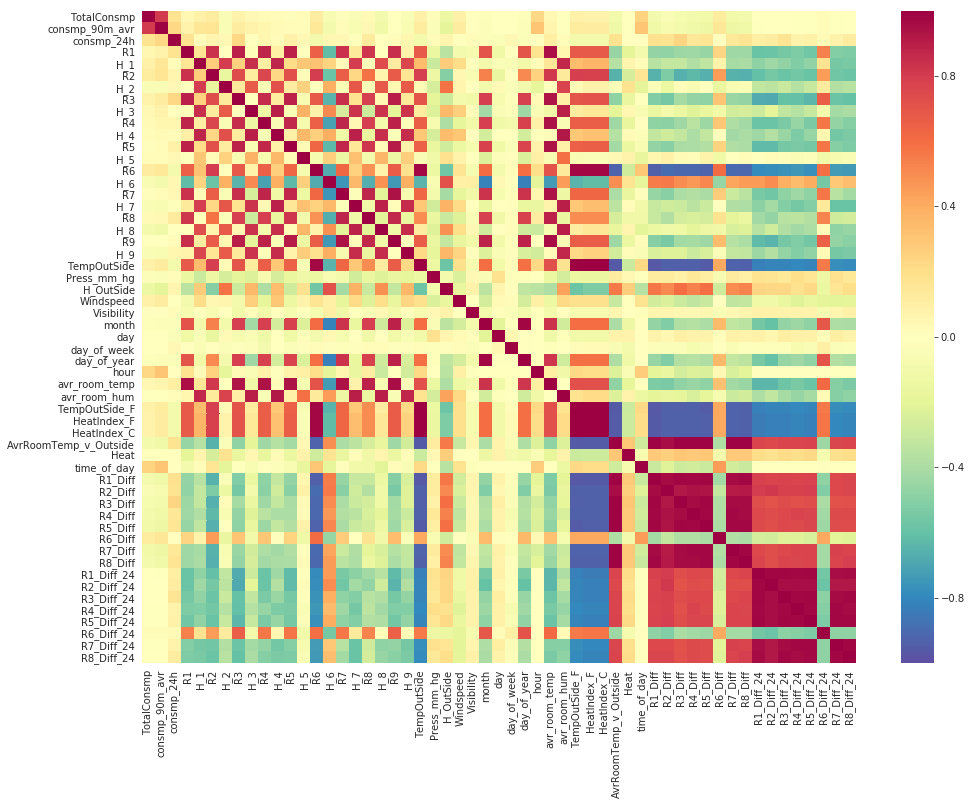

In [40]:
# all correlations heatmap
corr_df = df_mod.drop(['date', 'day_week_alpha', 'incr_prior', 'incr_prior_%'], axis=1)

corr1 = corr_df.corr()
plt.figure(figsize = (16,12))
sns.heatmap(corr1, vmin=-1, vmax=1, 
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values, cmap='Spectral_r');

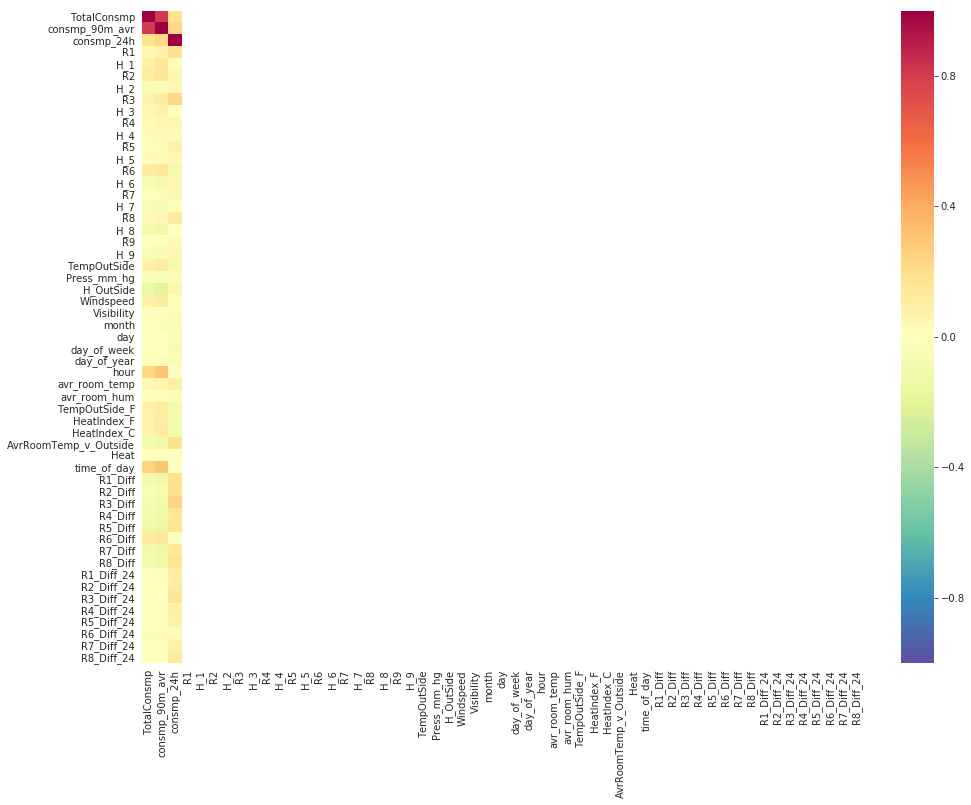

In [41]:
# correlations for all consumtpion variables
corr1 = corr_df.corr()
plt.figure(figsize = (16,12))
sns.heatmap(corr1.iloc[:,0:3], vmin=-1, vmax=1, 
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values, cmap='Spectral_r');

In [42]:
# correlations with 24-hour consumption feature
corr_list = sorted(df.corr().to_dict()['consmp_24h'].items(), key=lambda x: x[1], reverse=True)
corr_list

[('consmp_24h', 1.0),
 ('AC', nan),
 ('R3_Diff', 0.23892828908428107),
 ('R3', 0.23185924886175438),
 ('consmp_90m_avr', 0.2317990689245466),
 ('R1_Diff', 0.18552789715011242),
 ('R2_Diff', 0.1791734386879349),
 ('TotalConsmp', 0.1761121672508334),
 ('R1', 0.1754820492437937),
 ('AvrRoomTemp_v_Outside', 0.17314141937580893),
 ('R3_Diff_24', 0.1714738797012724),
 ('R8_Diff', 0.1696181361566325),
 ('R5_Diff', 0.16026809438656348),
 ('R4_Diff', 0.15403025746755908),
 ('R7_Diff', 0.1428978055149194),
 ('R8', 0.13194874651930358),
 ('R8_Diff_24', 0.11360910669454909),
 ('R2_Diff_24', 0.10988285678169),
 ('R1_Diff_24', 0.10911217949207105),
 ('avr_room_temp', 0.10851223488066031),
 ('incr_prior', 0.09861036986757457),
 ('R5', 0.08988759733527983),
 ('R5_Diff_24', 0.08876178619594881),
 ('R4_Diff_24', 0.07974634217601585),
 ('AvrRoomTemp_v_Windchill', 0.07770805588377042),
 ('R7_Diff_24', 0.0775969965245742),
 ('R2', 0.07016220320188733),
 ('H_OutSide', 0.06454071307253889),
 ('H_9', 0.062285

# Visualizations

## Spikes in Activity

Biggest issue in dealing with dataset is the spikes in activity. In this 3 day sample, we can see:

* Approximately 12 - 15 spikes
* In the largest activity spike, energy consuption increases over 6-fold
* Most spikes only last for 30 - 90 minutes
* Spikes make prediction more difficult
* Spikes are unlikely to be related to weather given the 
* Smoothing out data may help in prediction

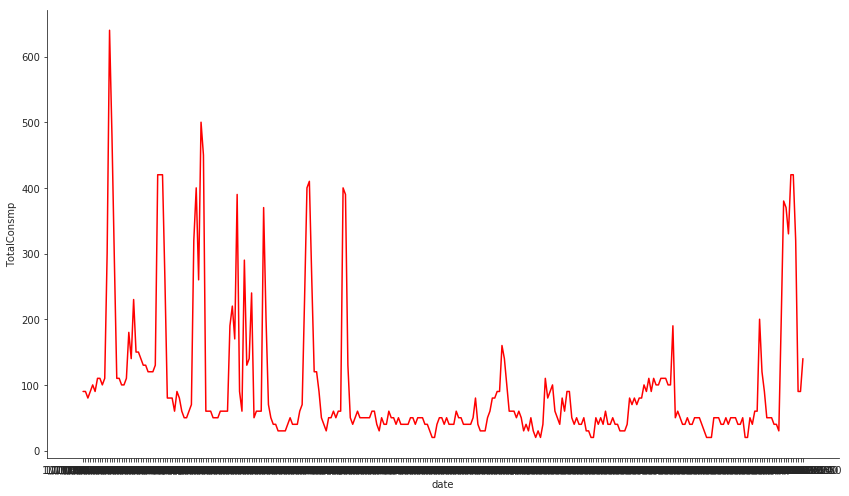

In [60]:
sns.set_style('ticks')
sns.relplot(x='date', y='TotalConsmp', data=df[:300], kind='line', color='red', height=7, aspect=1.7);

## Distribution Chart of Increases in Energy Consumption over Prior 10-Minute Period

* Shows most 10-minute periods are similar to prior period
* There are, however, a small percentage of periods with large increases of 100 - 300 Whs that distort data

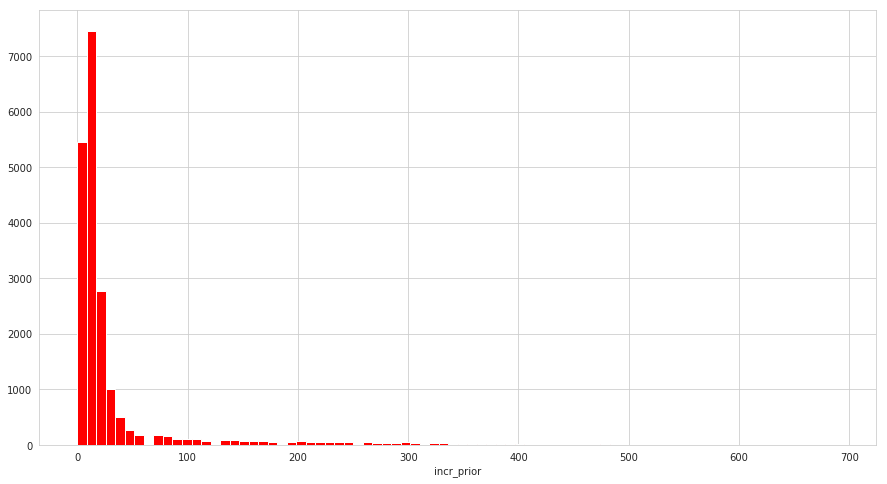

In [46]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.distplot(df['incr_prior'], bins=80, kde=None, color='red',hist_kws=dict(alpha=1) );

## Distribution Plot of Total Consumption

* Data has long right-tail

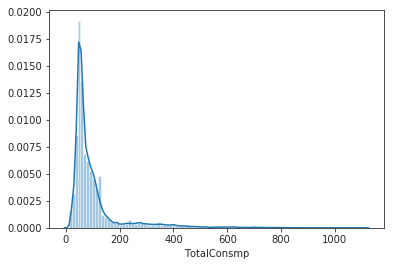

In [61]:
sns.distplot(df['TotalConsmp'], bins=100)

## Total Consumption by Hour of Day

* Low activity from 2 AM - 5 AM
* Activity starts to pick up at 5 AM
* Peak seems to be 9AM to 7PM (hour 19)
* Activity starts to taper off quickly around 11 PM (hour 23)

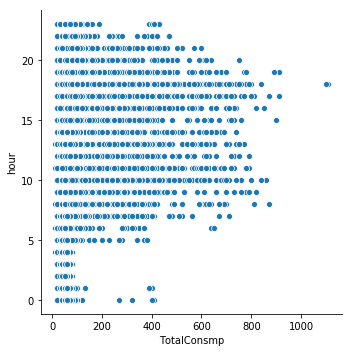

In [0]:
sns.relplot(x='TotalConsmp', y='hour', data=df)

In [0]:
df.columns

Index(['date', 'TotalConsmp', 'R1', 'H_1', 'R2', 'H_2', 'R3', 'H_3', 'R4',
       'H_4', 'R5', 'H_5', 'R6', 'H_6', 'R7', 'H_7', 'R8', 'H_8', 'R9', 'H_9',
       'TempOutSide', 'Press_mm_hg', 'H_OutSide', 'Windspeed', 'Visibility',
       'month', 'day', 'day_of_week', 'day_of_year', 'hour', 'day_week_alpha',
       'avr_room_temp', 'avr_room_hum', 'Incr_Prior', 'incr_prior_%',
       'R1_Diff', 'R1_Diff_Abs', 'R2_Diff', 'R2_Diff_Abs', 'R3_Diff',
       'R3_Diff_Abs', 'R4_Diff', 'R4_Diff_Abs', 'R5_Diff', 'R5_Diff_Abs',
       'R6_Diff', 'R6_Diff_Abs', 'R7_Diff', 'R7_Diff_Abs', 'R8_Diff',
       'R8_Diff_Abs', 'incr_prior'],
      dtype='object')

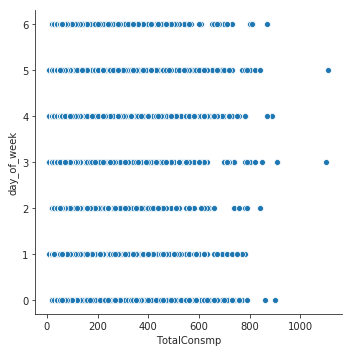

In [62]:
sns.relplot(x='TotalConsmp', y='day_of_week', data=df)

In [66]:
df.columns

Index(['date', 'TotalConsmp', 'R1', 'H_1', 'R2', 'H_2', 'R3', 'H_3', 'R4',
       'H_4', 'R5', 'H_5', 'R6', 'H_6', 'R7', 'H_7', 'R8', 'H_8', 'R9', 'H_9',
       'TempOutSide', 'Press_mm_hg', 'H_OutSide', 'Windspeed', 'Visibility',
       'month', 'day', 'day_of_week', 'day_of_year', 'hour', 'day_week_alpha',
       'avr_room_temp', 'avr_room_hum', 'incr_prior', 'incr_prior_%',
       'consmp_90m_avr', 'consmp_24h', 'TempOutSide_F', 'HeatIndex_F',
       'HeatIndex_C', 'WindChill_F', 'WindChill_C', 'AvrRoomTemp_v_Outside',
       'AvrRoomTemp_v_Windchill', 'AC', 'Heat', 'time_of_day', 'R1_Diff',
       'R2_Diff', 'R3_Diff', 'R4_Diff', 'R5_Diff', 'R6_Diff', 'R7_Diff',
       'R8_Diff', 'R1_Diff_24', 'R2_Diff_24', 'R3_Diff_24', 'R4_Diff_24',
       'R5_Diff_24', 'R6_Diff_24', 'R7_Diff_24', 'R8_Diff_24'],
      dtype='object')

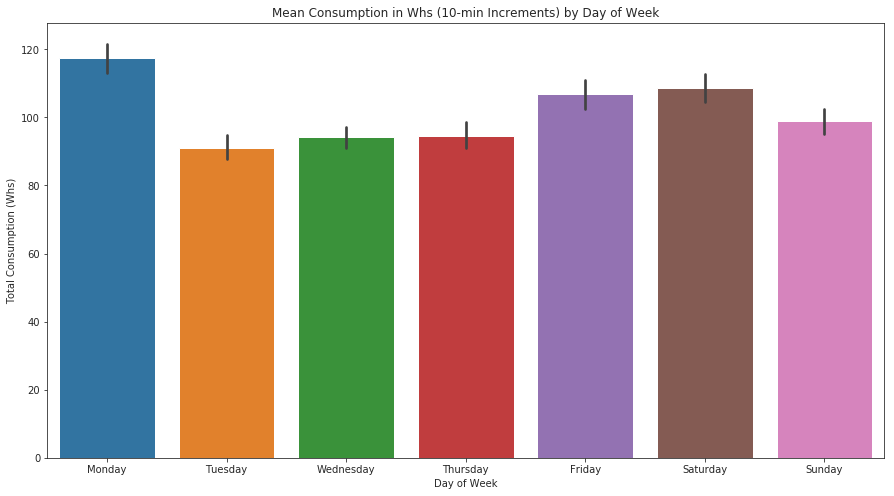

In [73]:
plt.figure(figsize=(15,8))
sns.barplot(x='day_week_alpha', y='TotalConsmp', data=df)
plt.xlabel('Day of Week')
plt.ylabel('Total Consumption (Whs)')
plt.title('Mean Consumption in Whs (10-min Increments) by Day of Week');

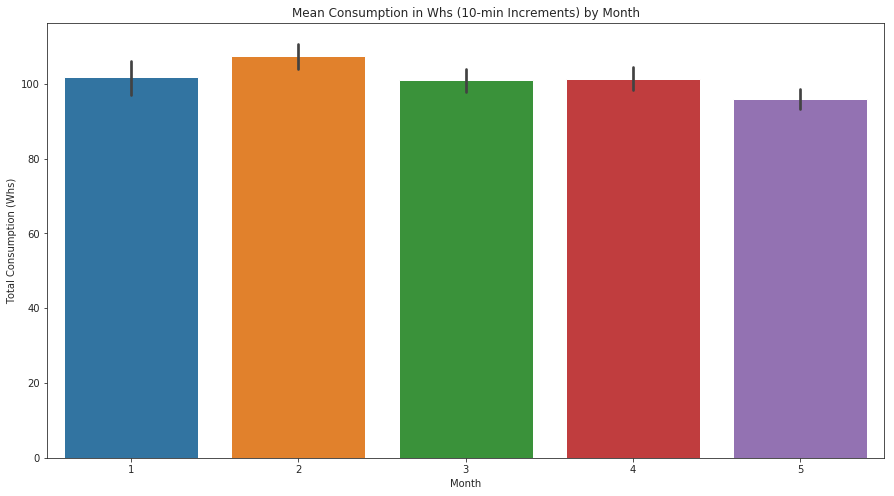

In [76]:
plt.figure(figsize=(15,8))
sns.barplot(x='month', y='TotalConsmp', data=df)
plt.xlabel('Month')
plt.ylabel('Total Consumption (Whs)')
plt.title('Mean Consumption in Whs (10-min Increments) by Month');

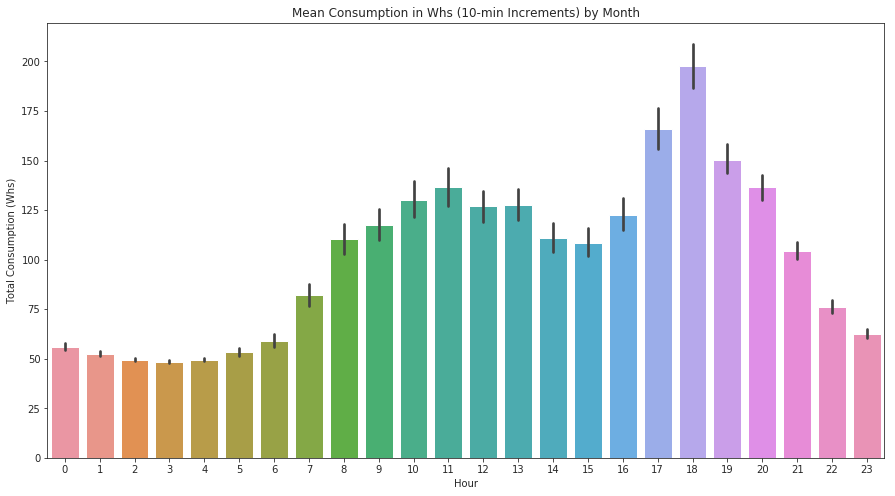

In [77]:
plt.figure(figsize=(15,8))
sns.barplot(x='hour', y='TotalConsmp', data=df)
plt.xlabel('Hour')
plt.ylabel('Total Consumption (Whs)')
plt.title('Mean Consumption in Whs (10-min Increments) by Hour of Day');

# Dealing with Outliers (Surges)

In [0]:
df_v2 = df.drop(df[(df['incr_prior_%'] > (1*np.std(df['incr_prior']))) | (df['incr_prior'] > np.std(df['incr_prior']))].index, inplace=False)

In [0]:
df_v2.columns

Index(['date', 'TotalConsmp', 'R1', 'H_1', 'R2', 'H_2', 'R3', 'H_3', 'R4',
       'H_4', 'R5', 'H_5', 'R6', 'H_6', 'R7', 'H_7', 'R8', 'H_8', 'R9', 'H_9',
       'TempOutSide', 'Press_mm_hg', 'H_OutSide', 'Windspeed', 'Visibility',
       'month', 'day', 'day_of_week', 'day_of_year', 'hour', 'day_week_alpha',
       'avr_room_temp', 'avr_room_hum', 'Incr_Prior', 'incr_prior_%',
       'R1_Diff', 'R1_Diff_Abs', 'R2_Diff', 'R2_Diff_Abs', 'R3_Diff',
       'R3_Diff_Abs', 'R4_Diff', 'R4_Diff_Abs', 'R5_Diff', 'R5_Diff_Abs',
       'R6_Diff', 'R6_Diff_Abs', 'R7_Diff', 'R7_Diff_Abs', 'R8_Diff',
       'R8_Diff_Abs', 'incr_prior', 'consmp_90m_avr', 'TempOutSide_F',
       'HeatIndex_F', 'HeatIndex_C', 'AvrRoomTemp_v_Outside', 'AC',
       'time_of_day'],
      dtype='object')

In [0]:
X = df_v2[['R1', 'H_1', 'R2', 'H_2', 'R3', 'H_3', 'R4',
       'H_4', 'R5', 'H_5', 'R6', 'H_6', 'R7', 'H_7', 'R8', 'H_8', 'R9', 'H_9',
       'TempOutSide', 'Press_mm_hg', 'H_OutSide', 'Windspeed', 'Visibility',
       'month', 'day', 'day_of_week', 'day_of_year', 'hour', 
       'avr_room_temp', 'avr_room_hum', 
       'R1_Diff', 'R1_Diff_Abs', 'R2_Diff', 'R2_Diff_Abs', 'R3_Diff',
       'R3_Diff_Abs', 'R4_Diff', 'R4_Diff_Abs', 'R5_Diff', 'R5_Diff_Abs',
       'R6_Diff', 'R6_Diff_Abs', 'R7_Diff', 'R7_Diff_Abs', 'R8_Diff',
       'R8_Diff_Abs',  'TempOutSide_F',
       'HeatIndex_F', 'HeatIndex_C', 'AvrRoomTemp_v_Outside', 'AC',
       'time_of_day']]
y = df_v2['consmp_90m_avr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

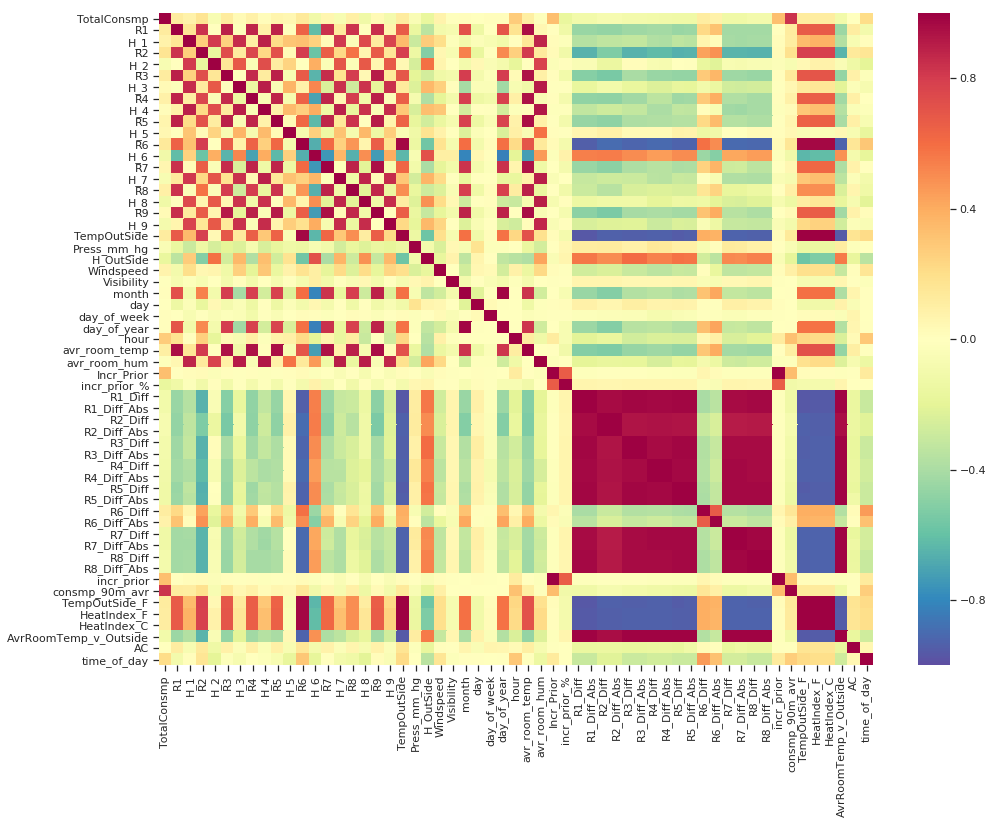

In [0]:
corr_df = df_v2.drop(['date', 'day_week_alpha'], axis=1)


corr1 = corr_df.corr()
plt.figure(figsize = (16,12))
sns.heatmap(corr1, vmin=-1, vmax=1, 
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values, cmap='Spectral_r');

# Model

In [0]:
corr_df.columns

Index(['TotalConsmp', 'consmp_90m_avr', 'consmp_24h', 'R1', 'H_1', 'R2', 'H_2',
       'R3', 'H_3', 'R4', 'H_4', 'R5', 'H_5', 'R6', 'H_6', 'R7', 'H_7', 'R8',
       'H_8', 'R9', 'H_9', 'TempOutSide', 'Press_mm_hg', 'H_OutSide',
       'Windspeed', 'Visibility', 'month', 'day', 'day_of_week', 'day_of_year',
       'hour', 'avr_room_temp', 'avr_room_hum', 'TempOutSide_F', 'HeatIndex_F',
       'HeatIndex_C', 'AvrRoomTemp_v_Outside', 'Heat', 'time_of_day',
       'R1_Diff', 'R2_Diff', 'R3_Diff', 'R4_Diff', 'R5_Diff', 'R6_Diff',
       'R7_Diff', 'R8_Diff', 'R1_Diff_24', 'R2_Diff_24', 'R3_Diff_24',
       'R4_Diff_24', 'R5_Diff_24', 'R6_Diff_24', 'R7_Diff_24', 'R8_Diff_24'],
      dtype='object')

In [0]:
X = corr_df[['R1', 'H_1', 'R2', 'H_2',
       'R3', 'H_3', 'R4', 'H_4', 'R5', 'H_5', 'R6', 'H_6', 'R7', 'H_7', 'R8',
       'H_8', 'R9', 'H_9', 'TempOutSide', 'Press_mm_hg', 'H_OutSide',
       'Windspeed', 'Visibility', 'month', 'day', 'day_of_week', 'day_of_year',
       'hour', 'avr_room_temp', 'avr_room_hum', 'TempOutSide_F', 'HeatIndex_F',
       'HeatIndex_C', 'AvrRoomTemp_v_Outside', 'Heat', 'time_of_day',
       'R1_Diff', 'R2_Diff', 'R3_Diff', 'R4_Diff', 'R5_Diff', 'R6_Diff',
       'R7_Diff', 'R8_Diff', 'R1_Diff_24', 'R2_Diff_24', 'R3_Diff_24',
       'R4_Diff_24', 'R5_Diff_24', 'R6_Diff_24', 'R7_Diff_24', 'R8_Diff_24']]
y = corr_df['consmp_24h']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [0]:

# Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_pred, y_test) : 
    if len(y_test) == len(y_pred):
        return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))
      
# Root mean squared error (RMSE)
def rmse(y_pred, y_test):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [0]:
# Lasso Regression
lasso = Lasso()
model_lasso = lasso.fit(X_train,y_train)
pred_lasso = lasso.predict(X_test)
result_lasso = model_lasso.score(X_test, y_test)

print("=== Lasso Regression ===")
print("R2: " + str(result_lasso))
print("RMSLE: " + str(rmsle(pred_lasso, y_test)))
print("\n")

# Kernel Ridge Regression
kr = KernelRidge()
model_kr = kr.fit(X_train,y_train)
pred_kr = kr.predict(X_test)
result_kr = model_kr.score(X_test, y_test)

print("=== Kernel Ridge Regression ===")
print("R2: " + str(result_kr))
print("RMSLE: " + str(rmsle(pred_kr, y_test)))
print("\n")


# Linear Regression
lm = LinearRegression()
model_lm = lm.fit(X_train,y_train)
pred_lm = lm.predict(X_test)
result_lm = model_lm.score(X_test, y_test)

print("=== Linear Regression ===")
print("R2: " + str(result_lm))
print("RMSLE: " + str(rmsle(pred_lm, y_test)))
print("\n")


# # Decision Tree Regression
dtr = DecisionTreeRegressor()
model_dtr = dtr.fit(X_train,y_train)
pred_dtr = dtr.predict(X_test)
result_dtr = model_dtr.score(X_test, y_test)

print("=== Decision Tree Regression ===")
print("R2: " + str(result_dtr))
print("RMSLE: " + str(rmsle(pred_dtr, y_test)))
print("\n")


# Random Forest Regression
rfr = RandomForestRegressor()
model_rfr = rfr.fit(X_train,y_train)
pred_rfr = rfr.predict(X_test)
result_rfr = model_rfr.score(X_test, y_test)


print("=== Random Forest Regression ===")
print("R2: " + str(result_rfr))
print("RMSLE: " + str(rmsle(pred_rfr, y_test)))
print("RMSE: " + str(rmse(pred_rfr, y_test)))
print("\n")


# Extra Trees Regression
etr = ExtraTreesRegressor()
model_etr = etr.fit(X_train,y_train)
pred_etr = etr.predict(X_test)
result_etr = model_etr.score(X_test, y_test)

print("=== Extra Trees Regression ===")
print("R2: " + str(result_etr))
print("RMSLE: " + str(rmsle(pred_etr, y_test)))
print("\n")


# Support Vector Regression
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X_train_svm = sc_X.fit_transform(X_train)
# y_train_svm = sc_y.fit_transform(y_train.reshape(-1, 1))
# X_test_svm = sc_X.fit_transform(X_test)

# svr = SVR(C=1.0, kernel='rbf')
# model_svr = svr.fit(X_train_svm, y_train_svm)
# pred_svr = svr.predict(X_test_svm)
# result_svr = model_svr.score(X_test_svm, y_test)
# print("=== Support Vector Regression ===")
# print("R2: " + str(result_svr))
# print("RMSLE: " + str(rmsle(pred_svr, y_test)))
# print("\n")


# # Kernel Ridge Regression
# kr = KernelRidge()
# model_kr = kr.fit(X_train,y_train)
# pred_kr = kr.predict(X_test)
# result_kr = model_kr.score(X_test, y_test)
# cv_scores_kr = cross_val_score(kr, X_test, y_test, cv=5, scoring='neg_mean_squared_log_error')
# kr_rmsle = np.sqrt(np.abs(cv_scores_kr.mean()))

# regressions.append('kr')
# predictions.append(pred_kr)

# print("=== Kernel Ridge Regression ===")
# print("R2: " + str(result_kr))
# print("RMSLE: " + str(rmsle(pred_kr, y_test)))
# print("Mean RMSLE Score: ", kr_rmsle.mean())
# print("\n")


# # Lasso Regression
# lasso = Lasso()
# model_lasso = lasso.fit(X_train,y_train)
# pred_lasso = lasso.predict(X_test)
# result_lasso = model_lasso.score(X_test, y_test)
# cv_scores_lasso = cross_val_score(lasso, X_test,y_test, cv=5, scoring='neg_mean_squared_log_error')
# lasso_rmsle = np.sqrt(np.abs(cv_scores_lasso.mean()))

# print("=== Lasso Regression ===")
# print("R2: " + str(result_lasso))
# print("RMSLE: " + str(rmsle(pred_lasso, y_test)))
# print("Mean RMSLE Score: ", lasso_rmsle.mean())
# print("\n")


# # Elastic Net
# en = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
# model_en = en.fit(X_train,y_train)
# pred_en = en.predict(X_test)
# result_en= model_en.score(X_test, y_test)




# print("=== Elastic Net ===")
# print("R2: " + str(result_en))
# print("RMSLE: " + str(rmsle(pred_en, y_test)))
# # print("Mean RMSLE Score: ", en_rmsle.mean())
# print("\n")


# # Bayesian Ridge
# br = BayesianRidge()
# model_br = br.fit(X_train,y_train)
# pred_br = br.predict(X_test)
# result_br= model_br.score(X_test, y_test)
# # cv_scores_br = cross_val_score(br, X_test,y_test, cv=5, scoring='neg_mean_squared_log_error')
# # br_rmsle = np.sqrt(np.abs(cv_scores_br.mean()))

# # regressions.append('br')
# # predictions.append(pred_br)

# print("=== Bayesian Ridge ===")
# print("R2: " + str(result_br))
# print("RMSLE: " + str(rmsle(pred_br, y_test)))
# # print("Mean RMSLE Score: ", br_rmsle.mean())
# print("\n")


# # # Lasso Lars IC
# # lasso_lars_ic = LassoLarsIC()
# # model_lasso_lars_ic = lasso_lars_ic.fit(X_train,y_train)
# # pred_lasso_lars_ic = lasso_lars_ic.predict(X_test)
# # result_lasso_lars_ic = model_lasso_lars_ic.score(X_test, y_test)
# # print("=== Lasso Lars IC ===")
# # print("R2: " + str(result_lasso_lars_ic))
# # print("RMSLE: " + str(rmsle(pred_lasso_lars_ic, y_test)))
# # print("\n")

# # Gradient Boosting
# gbr = GradientBoostingRegressor()
# model_gbr = gbr.fit(X_train,y_train)
# pred_gbr = gbr.predict(X_test)
# result_gbr= model_gbr.score(X_test, y_test)
# cv_scores_gbr = cross_val_score(gbr, X_test,y_test, cv=10, scoring='neg_mean_squared_log_error')
# gbr_rmsle = np.sqrt(np.abs(cv_scores_gbr.mean()))

# print("=== Gradient Boosting Regression ===")
# print("R2: " + str(result_gbr))
# print("RMSLE: " + str(rmsle(pred_gbr, y_test)))
# # print("\n")
# print("Mean RMSLE Score: ", gbr_rmsle)
# print("\n")

=== Lasso Regression ===
R2: 0.5736123865135536
RMSLE: 0.8537523082047495


=== Kernel Ridge Regression ===
R2: 0.5799505982068863
RMSLE: 0.8557007630225582


=== Linear Regression ===
R2: 0.5801488052055527
RMSLE: 0.8569853622602728


=== Decision Tree Regression ===
R2: 0.96931917704136
RMSLE: 0.21329530060712973


=== Random Forest Regression ===
R2: 0.9897931863042233
RMSLE: 0.18844537231037412
RMSE: 457.3396811004976


=== Extra Trees Regression ===
R2: 0.9951222034021733
RMSLE: 0.2759091618847969




In [0]:
lasso_fi=Lasso()
lasso_fi.fit(X, y)
FI_lasso = pd.DataFrame({"Feature Importance":lasso_fi.coef_}, index=X.columns)
FI_sorted = FI_lasso.sort_values("Feature Importance",ascending=False)
print(FI_sorted.to_string())
FI_sorted.index

                       Feature Importance
avr_room_temp                  2726.19918
R3_Diff_24                     2582.57369
R3                             1707.62700
R8_Diff_24                      903.00061
month                           652.40854
TempOutSide                     632.95859
R6_Diff_24                      616.04858
R6_Diff                         536.29960
time_of_day                     479.50447
R3_Diff                         455.72458
R4                              289.82845
H_9                             272.04352
R1                              217.47892
H_2                             196.91973
H_1                             164.21603
R2_Diff_24                      148.72009
AvrRoomTemp_v_Outside           100.28584
Press_mm_hg                      97.88898
H_8                              85.24157
Windspeed                        83.67261
H_4                              78.13293
day_of_week                      71.26707
H_5                              7

Index(['avr_room_temp', 'R3_Diff_24', 'R3', 'R8_Diff_24', 'month',
       'TempOutSide', 'R6_Diff_24', 'R6_Diff', 'time_of_day', 'R3_Diff', 'R4',
       'H_9', 'R1', 'H_2', 'H_1', 'R2_Diff_24', 'AvrRoomTemp_v_Outside',
       'Press_mm_hg', 'H_8', 'Windspeed', 'H_4', 'day_of_week', 'H_5',
       'R7_Diff_24', 'R4_Diff', 'R7', 'H_6', 'Visibility', 'R7_Diff',
       'R1_Diff', 'HeatIndex_C', 'HeatIndex_F', 'H_7', 'R5_Diff', 'R5',
       'H_OutSide', 'day', 'hour', 'day_of_year', 'TempOutSide_F', 'R8_Diff',
       'R2_Diff', 'R2', 'R8', 'R6', 'H_3', 'avr_room_hum', 'R5_Diff_24',
       'R4_Diff_24', 'R1_Diff_24', 'Heat', 'R9'],
      dtype='object')

In [0]:
# Root mean squared error (RMSE)
def rmse(y_pred, y_test):
  return np.sqrt(mean_squared_error(y_test, y_pred))


# Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_pred, y_test) : 
    if len(y_test) == len(y_pred):
        return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))


class CvScore(object):
  def __init__(self, list, name_list, X, y, folds=5, score='neg_mean_squared_error', seed=66, split=0.33):
    self.X = X
    self.y = y
    self.folds = folds
    self.score = score
    self.seed = seed
    self.split = split
    self.model = list[0]
    self.list = list
    self.name = name_list[0]
    self.name_list = name_list
    
  def cv(self):
    cv_score = cross_val_score(self.model, self.X, self.y, cv=self.folds, scoring=self.score)
    score_array = np.sqrt(-cv_score)
    mean_rmse = np.mean(score_array)
    print("Mean RMSE: ", mean_rmse)
    
  def cv_list(self):
    for name, model in zip(self.name_list, self.list):
      cv_score = cross_val_score(model, self.X, self.y, cv=self.folds, scoring=self.score)
      score_array = np.sqrt(-cv_score)
      mean_rmse = np.mean(score_array)
      std_rmse = np.std(score_array)
      print("{}: {:.5f}, {:.4f}".format(name, mean_rmse, std_rmse))

In [0]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
lasso_lars = LassoLarsIC()
rfr = RandomForestRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
svr = SVR()
linear_svr = LinearSVR()
en = ElasticNet()
br = BayesianRidge()
kr = KernelRidge()

In [0]:
regression_list = [lr, ridge, lasso, lasso_lars, rfr, etr, gbr, svr, linear_svr, en, br, kr]
name_list = ["Linear", "Ridge", "Lasso", "Lasso Lars", "Random Forest", "Extra Trees", "Grad Boost", "SVR", "LinSVR", 
             "ElasticNet", "Bayesian Ridge", "Kernel Ridge"]

In [0]:
model_one = CvScore(regression_list, name_list, X, y)
model_one.cv_list()

Linear: 38665.85206, 69421.5645
Ridge: 3741.09582, 742.5882
Lasso: 3614.85147, 732.8670
Lasso Lars: 3917.91955, 845.6153
Random Forest: 5066.38909, 1048.6801
Extra Trees: 5020.44199, 992.7944
Grad Boost: 4481.46948, 735.0354
SVR: 4482.46710, 800.1719
LinSVR: 3567.11342, 729.1365
ElasticNet: 3696.07057, 722.0276
Bayesian Ridge: 3909.43739, 802.4945
Kernel Ridge: 3740.01273, 742.7158
